In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
# Tên thư mục chứa các file CSV
folder_name = 'Dataset'

# Danh sách các file CSV trong thư mục
csv_files = [file for file in os.listdir(folder_name) if file.endswith('.csv')]

if not csv_files:
    raise ValueError("No CSV files found in the directory")

# Đọc và kết hợp các file CSV với mã hóa 'utf-8-sig'
combined_csv = pd.concat([pd.read_csv(os.path.join(folder_name, file), encoding='utf-8-sig') for file in csv_files])

# # Lưu file CSV kết hợp với mã hóa 'utf-8-sig'
# combined_csv.to_csv('combined_csv_file.csv', index=False, encoding='utf-8-sig')


In [2]:
df = combined_csv
df = pd.DataFrame(df)
# In ra danh sách các cột để kiểm tra
print(df.columns)

Index(['address', 'categoryName', 'claimThisBusiness', 'googleFoodUrl',
       'hotelStars', 'location/lat', 'location/lng', 'openingHours/0/day',
       'openingHours/0/hours', 'openingHours/1/day', 'openingHours/1/hours',
       'openingHours/2/day', 'openingHours/2/hours', 'openingHours/3/day',
       'openingHours/3/hours', 'openingHours/4/day', 'openingHours/4/hours',
       'openingHours/5/day', 'openingHours/5/hours', 'openingHours/6/day',
       'openingHours/6/hours', 'price', 'rank', 'state', 'street', 'title',
       'totalScore', 'url', 'website', 'reviewsCount', 'phone'],
      dtype='object')


In [3]:
df = df.drop(['claimThisBusiness','googleFoodUrl','openingHours/0/day', 'openingHours/1/day', 'openingHours/1/hours',
       'openingHours/2/day', 'openingHours/2/hours', 'openingHours/3/day',
       'openingHours/3/hours', 'openingHours/4/day', 'openingHours/4/hours',
       'openingHours/5/day', 'openingHours/5/hours', 'openingHours/6/day',
       'openingHours/6/hours','price','rank','url', 'website','phone', 'street' ],axis=1)

In [4]:
print(df.columns)

Index(['address', 'categoryName', 'hotelStars', 'location/lat', 'location/lng',
       'openingHours/0/hours', 'state', 'title', 'totalScore', 'reviewsCount'],
      dtype='object')


In [5]:
data = df.copy()
# Step 1: Tách chuỗi để lấy tên Quận từ cột 'state'
data['state'] = data['state'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)

# Step 2: Tách số sao từ cột 'hotelStars'
data['hotelStars'] = data['hotelStars'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if pd.notnull(x) else x)

# Step 3: Lọc các dòng dựa trên giá trị của cột 'categoryName' và tạo cột 'Loại hình'
keywords = {
    'Nhà hàng/ địa điểm ăn uống': {'Quán ăn','Nhà hàng', 'Quán cà phê', 'Tiệm bánh', 'Quán bia'},
    'Khách sạn': {'Khách sạn','Căn hộ'},
    'Điểm thu hút khách du lịch': {'Bảo tàng', 'Điểm thu hút khách du lịch', 'Công viên', 'Quán bar karaoke', 'Bar', 'Chợ', 'Phòng trưng bày nghệ thuật', 'Trung tâm mua sắm', 'Trung tâm thương mại', 'Trung tâm vui chơi'}
}

# Fix the function to handle NaN values in 'categoryName' column
def categorize(row):
    if pd.isnull(row):
        return None
    for category, kw_set in keywords.items():
        if any(kw in row for kw in kw_set):
            return category
    return None
# Fix the lambda function to handle NaN values in 'hotelStars' column correctly
#data['hotelStars'] = data['hotelStars'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if pd.notnull(x) else x)

# Apply the categorization function and drop rows where the 'Loại hình' is None
data['Loại hình'] = data['categoryName'].apply(categorize)
data = data.dropna(subset=['Loại hình'])

# Display the processed dataframe
data.head()


,address,categoryName,hotelStars,location/lat,location/lng,openingHours/0/hours,state,title,totalScore,reviewsCount,Loại hình
0,"2 Đ. Phù Đổng Thiên Vương, Phường 11, Quận 5, ...",Nhà hàng bánh kếp,NaN,10.752221,106.662932,15:00 to 20:00,Quận 5,Chú bánh hẹ Chợ Xã Tây,4.5,8,Nhà hàng/ địa điểm ăn uống
1,"412 Đ. Nguyễn Trãi, Phường 8, Quận 5, Hồ Chí M...",Khách sạn,NaN,10.755379,106.672899,NaN,Quận 5,Khách Sạn Như Phượng 2,3.6,20,Khách sạn
2,"No 10 Cao Dat - Tran Binh Trong Street, Phường...",Khách sạn,2.0,10.754048,106.682054,NaN,Quận 5,Hera Halong Hotel,3.0,3,Khách sạn
3,"126 Đ. Hùng Vương, Phường 12, Quận 5, Hồ Chí M...",Nhà hàng Hàn Quốc,NaN,10.755849,106.662619,10:30 to 22:00,Quận 5,Dookki,3.7,151,Nhà hàng/ địa điểm ăn uống
4,"206/23 Đ. Trần Hưng Đạo, Phường 11, Quận 5, Hồ...",Quán ăn nhỏ,NaN,10.753111,106.666192,06:00 to 11:00,Quận 5,Hủ tiếu Minh Ký,4.4,41,Nhà hàng/ địa điểm ăn uống


In [6]:
data = data[data['address'].str.contains('Hồ Chí Minh', na=False)]
quan_thanhpho_hcm = [
    "Quận 1", "Quận 2", "Quận 3", "Quận 4", "Quận 5", 
    "Quận 6", "Quận 7", "Quận 8", "Quận 9", "Quận 10", 
    "Quận 11", "Quận 12", "Bình Tân", "Bình Thạnh", 
    "Gò Vấp", "Phú Nhuận", "Tân Bình", 
    "Tân Phú", "Thủ Đức",
    "Bình Chánh", "Cần Giờ", "Củ Chi", 
    "Hóc Môn", "Nhà Bè"
]

data = data[data['state'].isin(quan_thanhpho_hcm)]

In [7]:
# Display the processed dataframe
data.head()

,address,categoryName,hotelStars,location/lat,location/lng,openingHours/0/hours,state,title,totalScore,reviewsCount,Loại hình
0,"2 Đ. Phù Đổng Thiên Vương, Phường 11, Quận 5, ...",Nhà hàng bánh kếp,NaN,10.752221,106.662932,15:00 to 20:00,Quận 5,Chú bánh hẹ Chợ Xã Tây,4.5,8,Nhà hàng/ địa điểm ăn uống
1,"412 Đ. Nguyễn Trãi, Phường 8, Quận 5, Hồ Chí M...",Khách sạn,NaN,10.755379,106.672899,NaN,Quận 5,Khách Sạn Như Phượng 2,3.6,20,Khách sạn
2,"No 10 Cao Dat - Tran Binh Trong Street, Phường...",Khách sạn,2.0,10.754048,106.682054,NaN,Quận 5,Hera Halong Hotel,3.0,3,Khách sạn
3,"126 Đ. Hùng Vương, Phường 12, Quận 5, Hồ Chí M...",Nhà hàng Hàn Quốc,NaN,10.755849,106.662619,10:30 to 22:00,Quận 5,Dookki,3.7,151,Nhà hàng/ địa điểm ăn uống
4,"206/23 Đ. Trần Hưng Đạo, Phường 11, Quận 5, Hồ...",Quán ăn nhỏ,NaN,10.753111,106.666192,06:00 to 11:00,Quận 5,Hủ tiếu Minh Ký,4.4,41,Nhà hàng/ địa điểm ăn uống


                                                address        categoryName  \
0     2 Đ. Phù Đổng Thiên Vương, Phường 11, Quận 5, ...   Nhà hàng bánh kếp   
1     412 Đ. Nguyễn Trãi, Phường 8, Quận 5, Hồ Chí M...           Khách sạn   
2     No 10 Cao Dat - Tran Binh Trong Street, Phường...           Khách sạn   
3     126 Đ. Hùng Vương, Phường 12, Quận 5, Hồ Chí M...  Nhà hàng Hàn Quốc   
4     206/23 Đ. Trần Hưng Đạo, Phường 11, Quận 5, Hồ...         Quán ăn nhỏ   
...                                                 ...                 ...   
1783  36 Đường số 2, Phú Mỹ, Quận 7, Hồ Chí Minh, Vi...           Khách sạn   
1784  59 Đ. Lê Văn Lương, Tân Hưng, Quận 7, Thành ph...         Quán ăn nhẹ   
1785  Toà nhà Lincoln Bulding, 436, 436-440 Tân Phú,...           Khách sạn   
1788  PPF3+3JW, Phước Kiển, Nhà Bè, Hồ Chí Minh 7320...            Nhà hàng   
1792  873 Huỳnh Tấn Phát, Phú Thuận, Quận 7, Thành p...         Quán ăn nhẹ   

      hotelStars  location/lat  location/lng   Giờ 

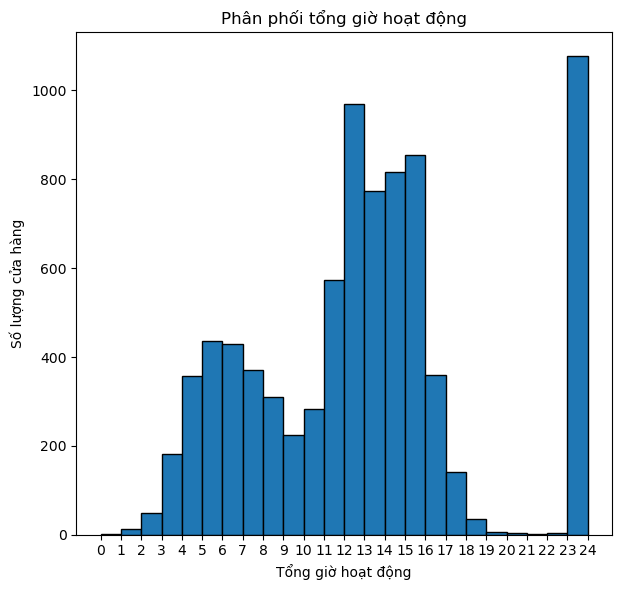

In [8]:
def parse_time(time_str):
    """Chuyển đổi chuỗi thời gian thành giờ và phút."""
    hour, minute = map(int, time_str.split(':'))
    return hour + minute / 60

def preprocess_opening_hours(hours):
    """Xử lý và tính toán tổng số giờ hoạt động."""
    if hours == "Mở cửa cả ngày":
        return 24
    else:
        first_time_range = hours.split(', ')[0]
        try:
            start_time, end_time = first_time_range.split(' to ')
            return abs(parse_time(end_time) - parse_time(start_time))
        except ValueError:
            return np.nan

def extract_opening_closing_times(time_ranges):
    """Tách giờ mở cửa và giờ đóng cửa, nếu không thể trích xuất thì trả về rỗng."""
    if time_ranges == "" or pd.isna(time_ranges):
        return "", ""  # Trả về rỗng cho các giá trị dữ liệu trống
    elif time_ranges == "Mở cửa cả ngày":
        opening_time = parse_time("00:00")
        closing_time = parse_time("24:00")
    else:
        if ', ' in time_ranges:
            first_time_range = time_ranges.split(', ')[0]
        else:
            first_time_range = time_ranges
        
        try:
            start_time, end_time = first_time_range.split(' to ')
            opening_time = parse_time(start_time)
            closing_time = parse_time(end_time)
        except ValueError:
            opening_time = np.nan
            closing_time = np.nan
    
    return opening_time, closing_time

def calculate_mean_times(times_list):
    """Tính toán trung bình của danh sách thời gian."""
    return np.mean(times_list)
df= data.copy()
df = df.rename(columns={'openingHours/0/hours': 'Giờ hoạt động'})
# Ensure all entries in 'Giờ hoạt động' are strings
df['Giờ hoạt động'] = df['Giờ hoạt động'].astype(str)

# Tách giờ mở cửa và giờ đóng cửa
df['Giờ mở cửa'], df['Giờ đóng cửa'] = zip(*df['Giờ hoạt động'].apply(extract_opening_closing_times))

# Áp dụng hàm xử lý lên cột "Giờ hoạt động" để tính tổng giờ hoạt động
df['Tổng giờ hoạt động'] = df['Giờ hoạt động'].apply(preprocess_opening_hours)

print(df)

# Vẽ biểu đồ phân phối giờ mở cửa, giờ đóng cửa và tổng giờ hoạt động
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 3)
plt.hist(df['Tổng giờ hoạt động'], bins=np.arange(0, 25, 1), edgecolor='black')
plt.xlabel('Tổng giờ hoạt động')
plt.ylabel('Số lượng cửa hàng')
plt.title('Phân phối tổng giờ hoạt động')
plt.xticks(np.arange(0, 25, 1))

plt.tight_layout()
plt.show()

In [9]:
df.head()

,address,categoryName,hotelStars,location/lat,location/lng,Giờ hoạt động,state,title,totalScore,reviewsCount,Loại hình,Giờ mở cửa,Giờ đóng cửa,Tổng giờ hoạt động
0,"2 Đ. Phù Đổng Thiên Vương, Phường 11, Quận 5, ...",Nhà hàng bánh kếp,NaN,10.752221,106.662932,15:00 to 20:00,Quận 5,Chú bánh hẹ Chợ Xã Tây,4.5,8,Nhà hàng/ địa điểm ăn uống,15.0,20.0,5.0
1,"412 Đ. Nguyễn Trãi, Phường 8, Quận 5, Hồ Chí M...",Khách sạn,NaN,10.755379,106.672899,nan,Quận 5,Khách Sạn Như Phượng 2,3.6,20,Khách sạn,NaN,NaN,NaN
2,"No 10 Cao Dat - Tran Binh Trong Street, Phường...",Khách sạn,2.0,10.754048,106.682054,nan,Quận 5,Hera Halong Hotel,3.0,3,Khách sạn,NaN,NaN,NaN
3,"126 Đ. Hùng Vương, Phường 12, Quận 5, Hồ Chí M...",Nhà hàng Hàn Quốc,NaN,10.755849,106.662619,10:30 to 22:00,Quận 5,Dookki,3.7,151,Nhà hàng/ địa điểm ăn uống,10.5,22.0,11.5
4,"206/23 Đ. Trần Hưng Đạo, Phường 11, Quận 5, Hồ...",Quán ăn nhỏ,NaN,10.753111,106.666192,06:00 to 11:00,Quận 5,Hủ tiếu Minh Ký,4.4,41,Nhà hàng/ địa điểm ăn uống,6.0,11.0,5.0


In [10]:
df = df.drop('Giờ hoạt động',axis=1)

In [11]:
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("\nSố lượng hàng bị trùng lặp:", len(duplicate_rows))


Số lượng hàng bị trùng lặp: 0


In [12]:
output_file_path = 'Processed_Dataset.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')